## Evaluation of $5$ Outlier Handling Techniques using Skewness as Evaluation Matrics

### Outline of Analysis

1. Get the Data
2. Understand the data
3. Identifying Outliers with Interquartile Range (IQR)
4. Identifying Outliers with Visualization
5. Outlier Treatment
6. Display the Skewness for each method
7. Conclusion and Recommendation

## 1. Get the Data

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
data = pd.read_csv('clean_df.csv')

df = data.iloc[:, 1:]

df.head()

,DEPTH,ROP(1 ft),weight on bit (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Pump Press (psi),Flow In (gal/min),MTC,GR,RHOZ,NPHI,SP,Lithology
0,102.0,147.35,0.0,8.74,0.00,139.28,469.14,3.0,33.1662,2.3244,0.5684,75.7639,2
1,102.0,147.35,0.0,8.74,0.00,139.28,469.14,3.0,34.7645,2.3327,0.5615,75.9375,2
2,103.0,54.86,0.0,8.82,53.92,383.66,1068.03,3.0,37.5619,2.3339,0.6373,75.9375,2
3,103.0,54.86,0.0,8.82,53.92,383.66,1068.03,3.0,39.8455,2.3392,0.6641,76.4844,2
4,104.0,180.29,0.0,8.82,0.00,385.18,1068.02,3.0,40.4448,2.3290,0.7740,76.8750,2


## 2. Understand the data

In [37]:
df.describe()

,DEPTH,ROP(1 ft),weight on bit (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Pump Press (psi),Flow In (gal/min),MTC,GR,RHOZ,NPHI,SP,Lithology
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,3606.634596,45.283419,22.264289,125.370890,57.196377,1194.738465,719.853726,2.923603,137.279440,2.517993,0.146828,44.309351,1.059365
std,2299.664691,61.581119,9.543035,58.195908,24.645971,533.737692,155.133704,0.444269,66.191093,0.253907,0.158874,62.421243,0.751552
min,102.000000,0.910000,0.000000,4.510000,0.000000,139.280000,0.000000,2.130000,25.174400,1.834300,0.000900,-101.015600,0.000000
25%,1505.000000,11.930000,15.550000,112.600000,39.000000,604.780000,621.120000,2.510000,80.296800,2.397975,0.013000,14.095975,0.000000
50%,3510.000000,18.210000,23.390000,138.020000,53.220000,1374.220000,703.660000,3.000000,143.146850,2.559450,0.093650,53.750000,1.000000
75%,5605.000000,54.030000,30.130000,156.360000,78.810000,1665.150000,842.500000,3.250000,176.924850,2.606400,0.253475,73.750000,2.000000
max,7537.000000,694.860000,38.580000,271.540000,135.900000,2120.880000,1068.030000,3.970000,438.914600,3.856600,0.801800,172.656300,2.000000


In [38]:
df.shape

(1954, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DEPTH                  1954 non-null   float64
 1   ROP(1 ft)              1954 non-null   float64
 2   weight on bit (k-lbs)  1954 non-null   float64
 3   Surface Torque (psi)   1954 non-null   float64
 4   Rotary Speed (rpm)     1954 non-null   float64
 5   Pump Press (psi)       1954 non-null   float64
 6   Flow In (gal/min)      1954 non-null   float64
 7   MTC                    1954 non-null   float64
 8   GR                     1954 non-null   float64
 9   RHOZ                   1954 non-null   float64
 10  NPHI                   1954 non-null   float64
 11  SP                     1954 non-null   float64
 12  Lithology              1954 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 198.6 KB


## 3. Identifying Outliers with Interquartile Range (IQR)

In [3]:
df.describe()

,DEPTH,ROP(1 ft),weight on bit (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Pump Press (psi),Flow In (gal/min),MTC,GR,RHOZ,NPHI,SP,Lithology
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,3606.634596,45.283419,22.264289,125.370890,57.196377,1194.738465,719.853726,2.923603,137.279440,2.517993,0.146828,44.309351,1.059365
std,2299.664691,61.581119,9.543035,58.195908,24.645971,533.737692,155.133704,0.444269,66.191093,0.253907,0.158874,62.421243,0.751552
min,102.000000,0.910000,0.000000,4.510000,0.000000,139.280000,0.000000,2.130000,25.174400,1.834300,0.000900,-101.015600,0.000000
25%,1505.000000,11.930000,15.550000,112.600000,39.000000,604.780000,621.120000,2.510000,80.296800,2.397975,0.013000,14.095975,0.000000
50%,3510.000000,18.210000,23.390000,138.020000,53.220000,1374.220000,703.660000,3.000000,143.146850,2.559450,0.093650,53.750000,1.000000
75%,5605.000000,54.030000,30.130000,156.360000,78.810000,1665.150000,842.500000,3.250000,176.924850,2.606400,0.253475,73.750000,2.000000
max,7537.000000,694.860000,38.580000,271.540000,135.900000,2120.880000,1068.030000,3.970000,438.914600,3.856600,0.801800,172.656300,2.000000


In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DEPTH                    4100.000000
ROP(1 ft)                  42.100000
weight on bit (k-lbs)      14.580000
Surface Torque (psi)       43.760000
Rotary Speed (rpm)         39.810000
Pump Press (psi)         1060.370000
Flow In (gal/min)         221.380000
MTC                         0.740000
GR                         96.628050
RHOZ                        0.208425
NPHI                        0.240475
SP                         59.654025
Lithology                   2.000000
dtype: float64


In [5]:
print(df['ROP(1 ft)'].skew())

4.007897810545865


## 4. Identifying Outliers with Visualization

**Using Boxplot**

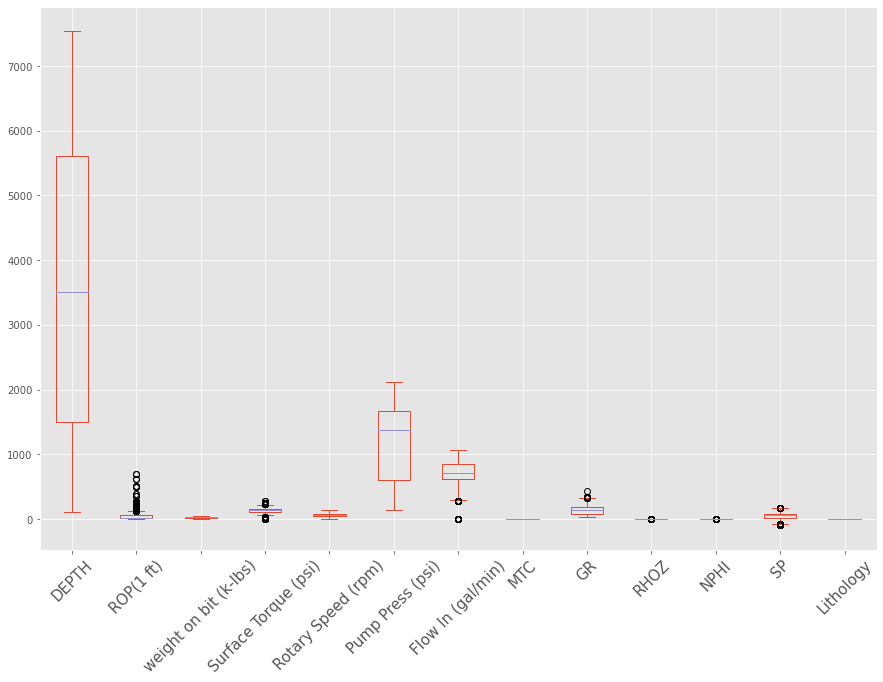

<Figure size 2160x1080 with 0 Axes>

In [33]:
plt.style.use('ggplot')
ax = df.plot.box(figsize=(15, 10))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

**Using  Histogram**

array([[<AxesSubplot:title={'center':'DEPTH'}>,
        <AxesSubplot:title={'center':'ROP(1 ft)'}>,
        <AxesSubplot:title={'center':'weight on bit (k-lbs)'}>,
        <AxesSubplot:title={'center':'Surface Torque (psi)'}>],
       [<AxesSubplot:title={'center':'Rotary Speed (rpm)'}>,
        <AxesSubplot:title={'center':'Pump Press (psi)'}>,
        <AxesSubplot:title={'center':'Flow In (gal/min)'}>,
        <AxesSubplot:title={'center':'MTC'}>],
       [<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'RHOZ'}>,
        <AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'SP'}>],
       [<AxesSubplot:title={'center':'Lithology'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

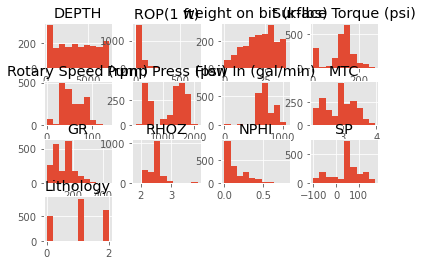

In [34]:
df.hist()

Hence, we can use the last plot ROP for our study

## 5. Outlier Treatment

### 1. Quantile-based Flooring and Capping

In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable $'ROP(1 ft)'$, respectively. These values will be used for quantile-based flooring and capping.

In [12]:
df_gb = df.copy()

In [13]:
q10 = df_gb['ROP(1 ft)'].quantile(0.10)

q90 = df_gb['ROP(1 ft)'].quantile(0.90)

print(q10)
print(q90)

7.62
120.51


Now we will remove the outliers, as shown in the lines of code below. Finally, we calculate the skewness value again, which comes out much better now.

In [14]:
df_gb['ROP(1 ft)'] = np.where(df_gb['ROP(1 ft)'] <q10, q10, df_gb['ROP(1 ft)'])
df_gb['ROP(1 ft)'] = np.where(df_gb['ROP(1 ft)'] >q90, q90, df_gb['ROP(1 ft)'])
print(df_gb['ROP(1 ft)'].skew())

1.2104738197620353


### 2. Trimming

In this method, we completely remove data points that are outliers

In [15]:
df_trim = df.copy()

In [16]:
index = df_trim[(df_trim['ROP(1 ft)'] >= 500)|(df_trim['ROP(1 ft)'] <= 1)].index
df_trim.drop(index, inplace=True)
df_trim['ROP(1 ft)'].describe()

count    1946.000000
mean       43.604697
std        53.103097
min         1.180000
25%        11.930000
50%        18.210000
75%        53.190000
max       492.980000
Name: ROP(1 ft), dtype: float64

In [17]:
df_trim.shape

(1946, 13)

In [18]:
print(df_trim['ROP(1 ft)'].skew())

2.5615794854994824


### 3. IQR Score
This technique uses the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of $(Q1 - 1.5 IQR)$ and $(Q3 + 1.5 IQR)$ is an outlier, and can be removed. The first line of code below removes outliers based on the IQR range and stores the result in the data frame 'df_out'. The second line prints the shape of this data, which comes out to be 1319 observations of 13 variables. This shows that for our data, a lot of records get deleted if we use the IQR method.

In [19]:
df_IQR = df.copy() #get a copy of the original data df

In [21]:
df_out = df_IQR[~((df_IQR < (Q1 - 1.5 * IQR)) |(df_IQR > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
print(df_out['ROP(1 ft)'].skew())

(1319, 13)
2.0681860995733916


As can be observed, both the trimming and the IQR score methods reduces the number of rows

### 4. Log Transformation
Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations. The most common is the logarithmic transformation, which is done still on the $'ROP(1 ft)'$ variable in the first line of code below. The second and third lines of code print the skewness value before and after the transformation.

In [40]:
df_LT = df.copy() # get a copy of the original data df

In [23]:
df_LT["ROP(1 ft)"] = df_LT["ROP(1 ft)"].map(lambda i: np.log(i) if i > 0 else 0) 

print(df_LT['ROP(1 ft)'].skew())

0.41452958272127305


In [24]:
df_LT["ROP(1 ft)"].shape

(1954,)

### 5. Replacing Outliers with Median Values

In [25]:
df_repmean = df.copy() #get a copy of the original data df
df_repmean.shape

(1954, 13)

In [26]:
df_repmean['ROP(1 ft)'].describe()

count    1954.000000
mean       45.283419
std        61.581119
min         0.910000
25%        11.930000
50%        18.210000
75%        54.030000
max       694.860000
Name: ROP(1 ft), dtype: float64

In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers. The first line of code below prints the 50th percentile value, or the median, which comes out to be 18.21. The second line prints the 95th percentile value, which comes out to be around 147.87499999999986. The third line of code below replaces all those values in the $'ROP(1 ft)'$ variable, which are greater than the 95th percentile, with the median value. Finally, the fourth line prints summary statistics after all these techniques have been employed for outlier treatment.

In [27]:
mean_val = df_repmean['ROP(1 ft)'].quantile(0.50)

q95_val = df_repmean['ROP(1 ft)'].quantile(0.95)

print(mean_val)
print(q95_val)

18.21
147.87499999999986


In [28]:
df_repmean['ROP(1 ft)'] = np.where(df_repmean['ROP(1 ft)'] > q95_val, mean_val, df_repmean['ROP(1 ft)'])
df_repmean['ROP(1 ft)'].describe()

count    1954.000000
mean       34.534074
std        35.754271
min         0.910000
25%        11.930000
50%        18.210000
75%        42.130000
max       147.350000
Name: ROP(1 ft), dtype: float64

In [29]:
df_repmean['ROP(1 ft)'].skew()

1.609510730311471

## 6. Display the Skewness for each method


In [30]:
print("Without Handling Outlier:", df['ROP(1 ft)'].skew())
print("")
print("After Handling Outlier with Flooring and Capping:", df_gb['ROP(1 ft)'].skew())
print("")
print("After Handling Outlier with trimming:", df_trim['ROP(1 ft)'].skew())
print("")
print("After Handling Outlier with IQR Score:", df_out['ROP(1 ft)'].skew())
print("")
print("After Handling Outlier with Log transform:", df_LT['ROP(1 ft)'].skew())
print("")
print("After Handling Outlier with mean replacement:", df_repmean['ROP(1 ft)'].skew())

Without Handling Outlier: 4.007897810545865

After Handling Outlier with Flooring and Capping: 1.2104738197620353

After Handling Outlier with trimming: 2.5615794854994824

After Handling Outlier with IQR Score: 2.0681860995733916

After Handling Outlier with Log transform: 0.41452958272127305

After Handling Outlier with mean replacement: 1.609510730311471


In [31]:
Non_Outlier_df = pd.DataFrame()  # we create data for the outlier handled techniques

Non_Outlier_df['Original_ROP'] = df['ROP(1 ft)']
Non_Outlier_df['Floor_Capping_ROP'] = df_gb['ROP(1 ft)']
Non_Outlier_df['Trimming_ROP'] = df_trim['ROP(1 ft)']
Non_Outlier_df['IQR_score_ROP'] = df_out['ROP(1 ft)']
Non_Outlier_df['Log_transform_ROP'] = df_LT['ROP(1 ft)']
Non_Outlier_df['Mean_rep_ROP'] = df_repmean['ROP(1 ft)']


Non_Outlier_df.head()

,Original_ROP,Floor_Capping_ROP,Trimming_ROP,IQR_score_ROP,Log_transform_ROP,Mean_rep_ROP
0,147.35,120.51,147.35,NaN,4.992811,147.35
1,147.35,120.51,147.35,NaN,4.992811,147.35
2,54.86,54.86,54.86,NaN,4.004784,54.86
3,54.86,54.86,54.86,NaN,4.004784,54.86
4,180.29,120.51,180.29,NaN,5.194567,18.21


Lets further visualize our results 

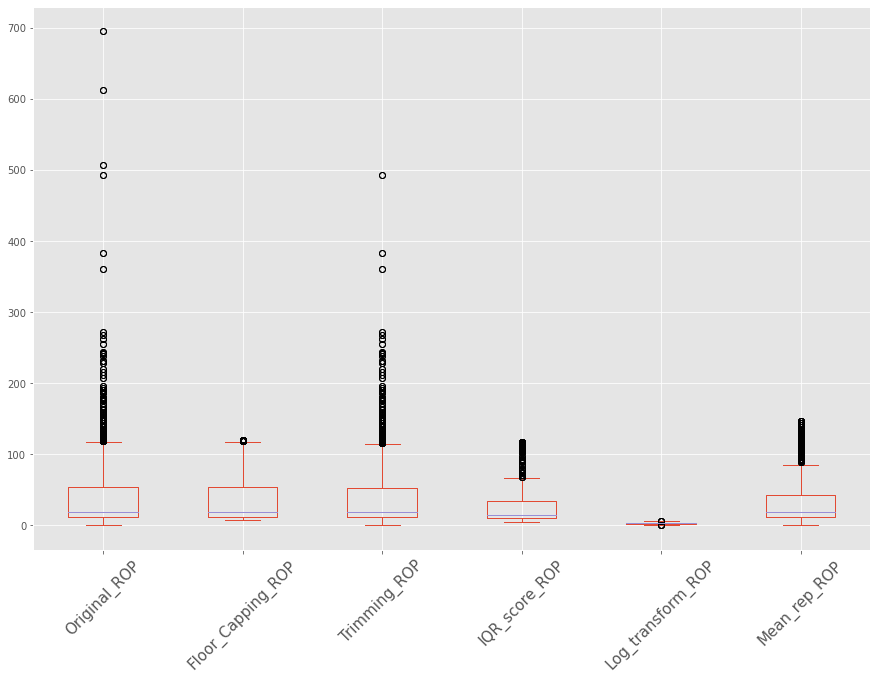

<Figure size 2160x1080 with 0 Axes>

In [32]:
plt.style.use('ggplot')
ax = Non_Outlier_df.plot.box(figsize=(15, 10))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

## 7. Conclusion and Recommendation
Hence, using the value of skewness for each method as an evaluation matrics:
- we can see that the Log transformation method for handling outlier for the $ROP(1 ft)$ column gave the lest value of skewness and hence happens to be the best. 
- The Winsorization (flooring and capping method) was the second best

## Note
It is also useful to note, that having the best skewness value may not guarantee best performance during model development and hence, all techniques should be subjected to model building to obtain the best.